# Peripheral Vascular Health dataset  

ABI and PWV are measured in the Human Phenotype Project to assess vascular health. ABI is a ratio of the systolic blood pressure in the ankle to the systolic blood pressure in the arm. PWV is the speed at which the pulse wave of the blood pressure travels along the wall of an artery or a combined length of arteries.

### ABI
Ankle-Brachial Index (ABI) measurements were conducted using the Falcon (Viasonix, Israel) device while subjects were in supine position. During the ABI test, primary systolic pressures are measured in each of the right and left brachial arteries, and right and left ankles. ABI is determined as the ratio between the brachial systolic pressure and the ankle pressure on each side providing ABI values per each side. The systolic pressures were based on a combination of blood pressure cuffs and blood flow reading with photoplethysmograph (PPG) sensors placed on the measured limb fingers.  Under normal circumstances, the blood pressure in the ankle will be very similar or identical to that measured in the arm, so the measured ABI value will be close to 1. In the case of peripheral arterial disease, there will be a discrepancy - the blood pressure at the ankle will be lower than the blood pressure in the arms. This will indicate insufficiency in the arteries that carry blood to the legs. In the general population, PAD affects about 10% of people over the age of 55.

### PWV
Pulse wave velocity (PWV) is considered a surrogate marker for arterial stiffness/elasticity, which is correlated with vascular disease (REF). Vascular elasticity is important for the normal vascular function for attenuation and smoothing of the pulsation intensity and blood flow. With age, and in combination with atherosclerosis processes, blood vessels may lose their elasticity and become stiff. Increased arterial stiffness can predict future vascular system problems.The contractions of the heart generate arterial blood pressure pulse waves which propagate through the arterial walls. PWV is defined as the velocity at which these arterial blood pressure pulses propagate. PWV is a quantitative parameter reflecting arterial stiffness. Higher PWV values reflect greater than normal arterial stiffness. 
While there is no one set standard of how or where to measure PWV, some of the more common PWV measurements include the baPWV, which reflects the pulse wave propagation between the brachial and ankle, cfPWV reflecting propagation between the carotid and femoral, and faPWV also know as leg PWV reflecting the PWV along the leg between the femoral and ankle.
In the HPP we measure leg PWV (faPWV). PWV is highly dependent on the method of measurement, as well as on the measurement sites. Therefore, typical values for baPWV differ from faPWV and cfPWV.
Based on literature reports, normal PWV values can range between around 6 m/s to 14 m/s, depending on the method of measurement, location and the patient’s age. For example, according to Laurent et al.  the PWV increases from 4–5 m/s in the ascending aorta to 5–6 m/s in the abdominal aorta then 8–9 m/s in the iliac and femoral arteries (Laurent et al. European Heart Journal (2006) 27, 2588–2605)

PWV has been recognized as an indicator of organ damage and a useful additional test in the investigation of high blood pressure, it is also a useful method for prediction of cardiovascular events and mortality. Studies have also shown that ABI is a reliable predictor of cardiovascular disease and mortality in patients with peripheral artery disease.

### Data availability:
The information is stored in 1 parquet file: `vascular_health.parquet`

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('vascular_health')
pl

PhenoLoader for vascular_health with
13 fields
2 tables: ['vascular_health', 'age_sex']

# Data dictionary

In [4]:
pl.dict

field_string  \
tabular_field_name                                                   
collection_timestamp                          Collection timestamp   
collection_date                       Collection date (YYYY-MM-DD)   
timezone                                                  Timezone   
r_ankle_pressure                              Right ankle pressure   
l_ankle_pressure                               Left ankle pressure   
r_brachial_pressure                        Right brachial pressure   
l_brachial_pressure                         Left brachial pressure   
r_abi                                                    Right ABI   
l_abi                                                     Left ABI   
from_r_thigh_to_r_ankle_pwv  PWV (from right thigh to right ankle)   
from_l_thigh_to_l_ankle_pwv    PWV (from left thigh to left ankle)   

                                                            description_string  \
tabular_field_name                                                               
collection_timestamp                                      Collection timestamp   
collection_date                                                           Date   
timezone                                                              Timezone   
r_ankle_pressure                    Systolic pressure value in the right ankle   
l_ankle_pressure                     Systolic pressure value in the left ankle   
r_brachial_pressure              Systolic pressure value in the right brachial   
l_brachial_pressure               Systolic pressure value in the left brachial   
r_abi                        ABI in the left side (right ankle to right bra...   
l_abi                        ABI in the right side (left ankle to left brac...   
from_r_thigh_to_r_ankle_pwv                                Pulse Wave Velocity   
from_l_thigh_to_l_ankle_pwv                            Calculated left leg PWV   

                             folder_id      feature_set            field_type  \
tabular_field_name                                                              
collection_timestamp                10  vascular_health              Datetime   
collection_date                     10  vascular_health                  Date   
timezone                            10  vascular_health  Categorical (single)   
r_ankle_pressure                    10  vascular_health            Continuous   
l_ankle_pressure                    10  vascular_health            Continuous   
r_brachial_pressure                 10  vascular_health            Continuous   
l_brachial_pressure                 10  vascular_health            Continuous   
r_abi                               10  vascular_health            Continuous   
l_abi                               10  vascular_health            Continuous   
from_r_thigh_to_r_ankle_pwv         10  vascular_health            Continuous   
from_l_thigh_to_l_ankle_pwv         10  vascular_health            Continuous   

                                      strata data_coding   array  \
tabular_field_name                                                 
collection_timestamp         Collection time         NaN  Single   
collection_date              Collection time         NaN  Single   
timezone                     Collection time      001_03  Single   
r_ankle_pressure                     Primary         NaN  Single   
l_ankle_pressure                     Primary         NaN  Single   
r_brachial_pressure                  Primary         NaN  Single   
l_brachial_pressure                  Primary         NaN  Single   
r_abi                                Primary         NaN  Single   
l_abi                                Primary         NaN  Single   
from_r_thigh_to_r_ankle_pwv          Primary         NaN  Single   
from_l_thigh_to_l_ankle_pwv          Primary         NaN  Single   

                                               pandas_dtype  \
tabular_field_name                                            
collection_

# Plot histogram and ecdf for r_abi at baseline visit


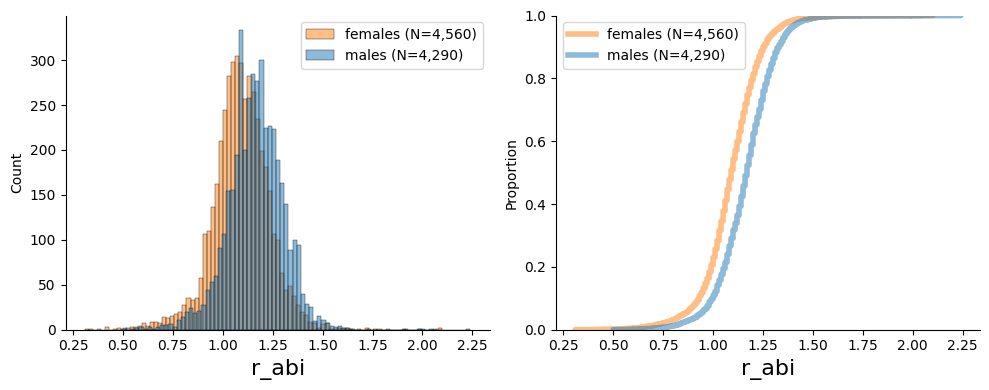

count      mean       std   min   25%   50%   75%   max
r_abi  8850.0  1.126168  0.148586  0.31  1.04  1.13  1.22  2.24

In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "r_abi"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)